In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#@title LOAD IMAGE
# Read Image
File_name = 'eye.jpg' #@param {type:'string'}
image = cv2.imread('eye.jpg')
output = image.copy()

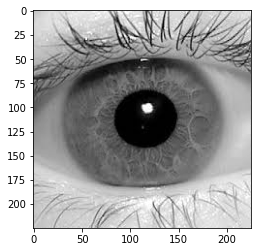

In [ ]:
# Convert to 1 channel only grayscale image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [ ]:
# CLAHE Equalization
# cl1 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# clahe = cl1.apply(gray)
# plt.imshow(clahe, cmap='gray')

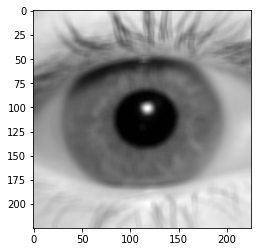

In [ ]:
#@title ADJUST BLURRING IMAGE { run:"auto"}
blurred = 20 #@param {type: "slider",min:0, max:100, step:1}
blur = cv2.GaussianBlur(gray ,(7,7),slider1)
plt.imshow(blur, cmap='gray')

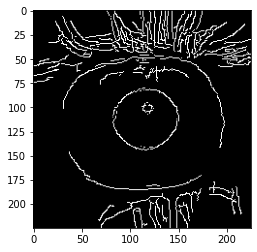

In [ ]:
#@title CANNY EDGE DETECTION{ run:"auto"}
Lower threshold=20 #@param {type: "slider",min:0, max:100, step:1}
Upper threshold=80 #@param {type: "slider",min:0, max:100, step:1}
canny = cv2.Canny(blur,slider2, slider3, apertureSize=3)
plt.imshow(canny, cmap='gray')

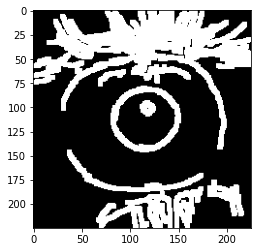

In [ ]:
#@title DILUTION{ run:"auto"}
Iteration=2 #@param {type: "slider",min:0, max:10, step:1}
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated = cv2.dilate(canny, kernel, iterations=Iteration)
plt.imshow(dilated, cmap='gray')

In [ ]:
#@title HOUGH TRANSFORM{ run:"auto"}
min_radius = 0 #@param {type: "slider",min:0, max:100, step:1} 
max_radius = 55 #@param {type: "slider",min:0, max:100, step:1}
circles = cv2.HoughCircles(dilated,cv2.HOUGH_GRADIENT,1,800,
                            param1=50,param2=30,minRadius=min_radius,maxRadius=max_radius)
circles = np.uint16(np.around(circles))

In [ ]:
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(output,(i[0],i[1]),2,(0,0,255),3)

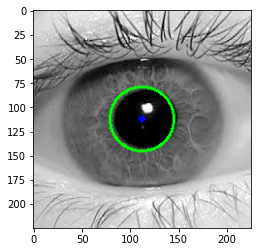

In [ ]:
plt.imshow(output)